In [1]:
def LTS(x, y, porcentaje_n, rep, rep2):
  from sklearn import linear_model
  lm = linear_model.LinearRegression()
  max_score = 0
  n = int(porcentaje_n*len(x))
  newx = np.ones(n)
  newy = np.ones(n)
  bestx = np.ones(n)
  besty = np.ones(n)
#find starting point randomly
  for i in range(rep):
    newx=np.array(sorted(random.sample(range(len(x)),n)))
    j=0
    for val in newx:
      newy[j]=y[val]
      j=j+1
  lm.fit(newx.reshape(-1, 1), newy)
  score = lm.score(newx.reshape(-1, 1), newy)
  if(score > max_score):
    max_score=score
    np.copyto(bestx, newx)
    np.copyto(besty, newy)
#alter starting point to get iteratively better
  for i in range(rep2):
    np.copyto(newx, bestx.astype(int))
    np.copyto(newy, besty.astype(int))
    flag = True
    while flag:
      xloc=random.randint(0,len(x)-1)
      if int(x[xloc]) not in newx:
        flag=False
    newxloc = random.randint(0, len(newx) - 1)
    newx[newxloc] = xloc
    newx = np.array(sorted(newx))
    j=0
    for val in newx:
      newy[j]=y[val]
      j=j+1
    lm.fit(newx.reshape(-1, 1), newy)
    score = lm.score(np.array(newx).reshape(-1, 1), newy)
    if(score > max_score):
      max_score = score
      np.copyto(bestx, newx)
      np.copyto(besty, newy)
      mejor_lm = lm
  return mejor_lm

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn import linear_model
# inicializar valores lineales
n_samples = 100
slope = -1
intercept = 1
x = np.ones(n_samples)
y = np.ones(n_samples)
# crear datos lineales con ruido
for i in range(n_samples):
  x[i] = i
  y[i] = slope * i + intercept + random.gauss(0, n_samples/5000)
xr = x.reshape(-1, 1)
title = ['sin outliers', 'outliers en un nivel', 'outliers aleatorios', 'un gran outlier']
#introducir outliers
# inicializar datos outliers
y1 = y.copy()
y2 = y.copy()
y3 = y.copy()
y4 = y.copy()
y5 = y.copy()
for i in range(n_samples):
  if i == 1:
    y5[i] == -5000
# uno de cada 25 puntos outlier contra
  if i%25 == 0:
    y2[i] = ((-1)**random.randint(-1,1))*y[i]
# uno de cada 25 puntos outlier aleatorio
  if i%25 == 1:
    y3[i] = random.gauss(0, 100)
        # un outlier muy grande
  if i == 99:
    y4[i] = -5000
    y4[i-1] = -5000
    y5[i] = 5000
# ajuste y1
lm1 = linear_model.LinearRegression()
lm1.fit(xr, y1)
## LinearRegression()
lts1 = LTS(x, y1, porcentaje_n=0.8, rep=20, rep2=10000)
# ajuste y2
lm2 = linear_model.LinearRegression()
lm2.fit(xr, y2)
## LinearRegression()
lts2 = LTS(x, y2, porcentaje_n=0.8, rep=20, rep2=10000)
# ajuste y3
lm3 = linear_model.LinearRegression()
lm3.fit(xr, y3)
## LinearRegression()
lts3 = LTS(x, y3, porcentaje_n=0.8, rep=20, rep2=10000)
# ajuste y4
lm4 = linear_model.LinearRegression()
lm4.fit(xr, y4)
## LinearRegression()
lts4 = LTS(x, y4, porcentaje_n=0.8, rep=20, rep2=10000)
# ajuste y5
lm5 = linear_model.LinearRegression()
lm5.fit(xr, y5)
## LinearRegression()
lts5 = LTS(x, y5, porcentaje_n=0.8, rep=20, rep2=10000)

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
y1_pred_lm = lm1.predict(xr)
y1_pred_lts = lts1.predict(xr)

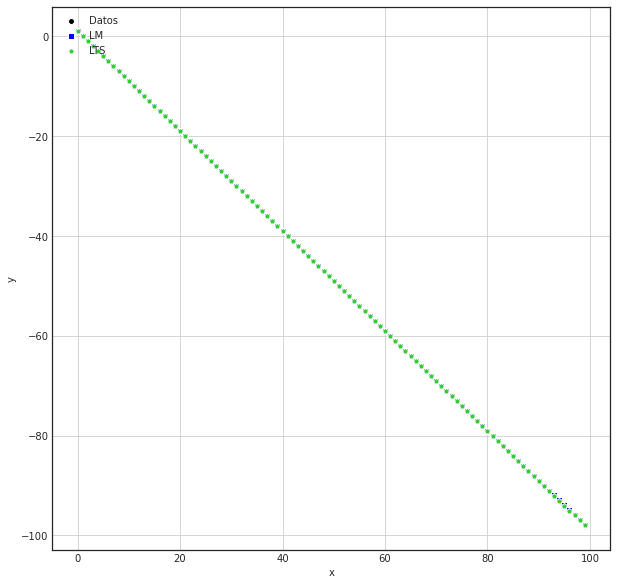

In [5]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(x, y1, c='black', marker='o', edgecolor='white',label='Datos')
    plt.scatter(x, y1_pred_lm, c='blue', marker='s', edgecolor='white',label='LM')
    plt.scatter(x, y1_pred_lts, c='limegreen', marker='p', edgecolor='white',label='LTS')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.grid()
plt.show()

In [6]:
y2_pred_lm = lm2.predict(xr)
y2_pred_lts = lts2.predict(xr)

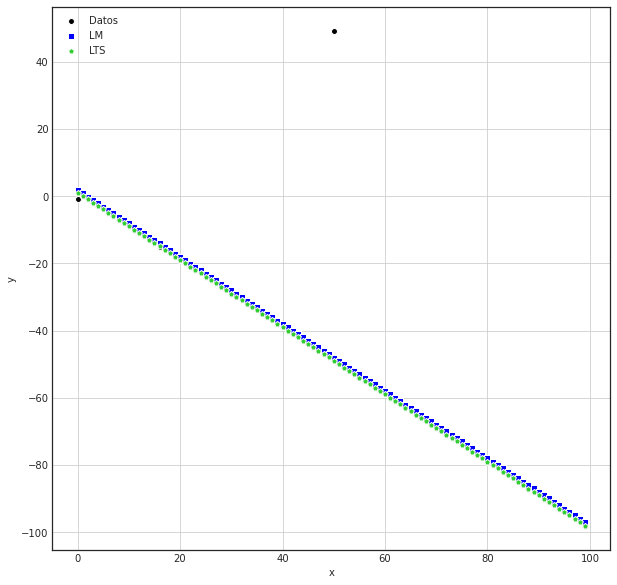

In [7]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(x, y2, c='black', marker='o', edgecolor='white',label='Datos')
    plt.scatter(x, y2_pred_lm, c='blue', marker='s', edgecolor='white',label='LM')
    plt.scatter(x, y2_pred_lts, c='limegreen', marker='p', edgecolor='white',label='LTS')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.grid()
plt.show()

In [8]:
y3_pred_lm = lm3.predict(xr)
y3_pred_lts = lts3.predict(xr)

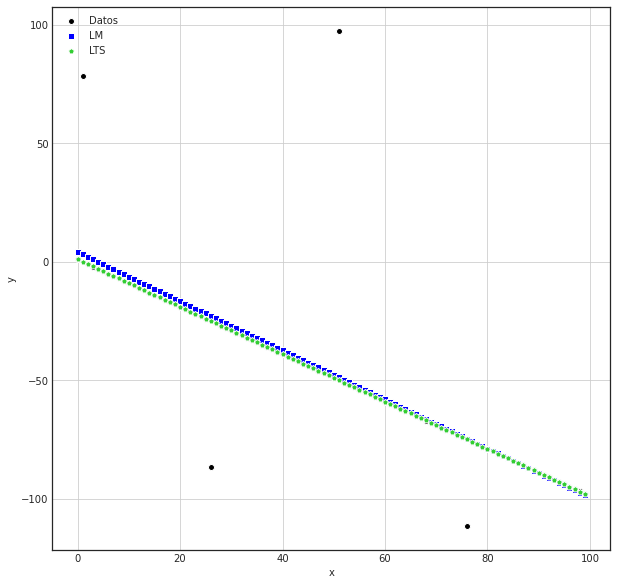

In [9]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(x, y3, c='black', marker='o', edgecolor='white',label='Datos')
    plt.scatter(x, y3_pred_lm, c='blue', marker='s', edgecolor='white',label='LM')
    plt.scatter(x, y3_pred_lts, c='limegreen', marker='p', edgecolor='white',label='LTS')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.grid()
plt.show()

In [10]:
y4_pred_lm = lm4.predict(xr)
y4_pred_lts = lts4.predict(xr)

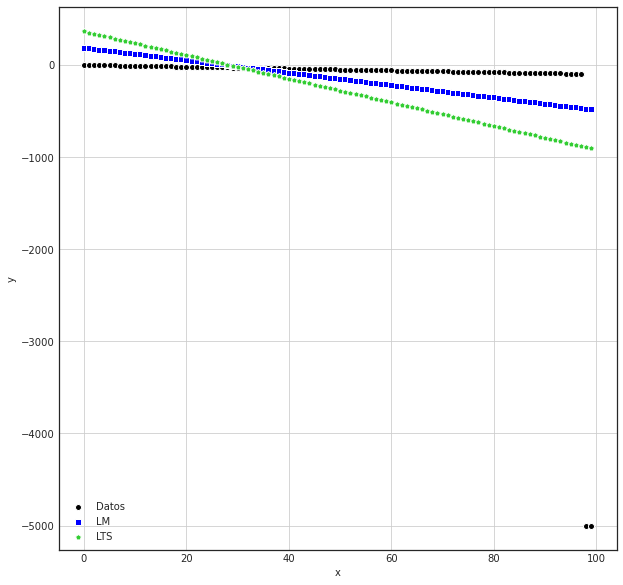

In [11]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(x, y4, c='black', marker='o', edgecolor='white',label='Datos')
    plt.scatter(x, y4_pred_lm, c='blue', marker='s', edgecolor='white',label='LM')
    plt.scatter(x, y4_pred_lts, c='limegreen', marker='p', edgecolor='white',label='LTS')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='lower left')
    plt.grid()
plt.show()

In [12]:
y5_pred_lm = lm5.predict(xr)
y5_pred_lts = lts5.predict(xr)

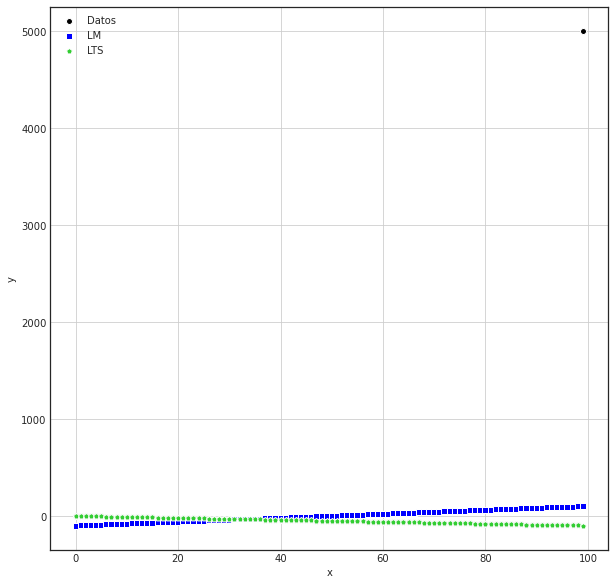

In [13]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(x, y5, c='black', marker='o', edgecolor='white',label='Datos')
    plt.scatter(x, y5_pred_lm, c='blue', marker='s', edgecolor='white',label='LM')
    plt.scatter(x, y5_pred_lts, c='limegreen', marker='p', edgecolor='white',label='LTS')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.grid()
plt.show()

# Comparativa de modelos

In [14]:
import pandas as pd
mod1 = ['lm1','lm2','lm3','lm4','lm5']
score1 = [lm1.score(xr,y1),lm2.score(xr,y2),lm3.score(xr,y3),lm4.score(xr,y4),lm5.score(xr,y5)]
mod2 = ['lts1','lts2','lts3','lts4','lts5']
score2 = [lts1.score(xr,y1),lts2.score(xr,y2),lts3.score(xr,y3),lts4.score(xr,y4),lts5.score(xr,y5)]
df = pd.DataFrame()
df['Modelo_lm'] = mod1
df['Score_lm'] = score1
df['Modelo_lts'] = mod2
df['Score_lts'] = score2
df

,Modelo_lm,Score_lm,Modelo_lts,Score_lts
0,lm1,0.999999,lts1,0.999999
1,lm2,0.897186,lts2,0.896190
2,lm3,0.732788,lts3,0.730536
3,lm4,0.079218,lts4,-0.016713
4,lm5,0.013547,lts5,-0.026922


Elaborado por Jairo Rojas

Créditos a quien corresponda por la elaboración de la función LTS